In [13]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.4 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.4 kB 393.8 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.4 kB 944.1 kB/s eta 0:00:01
   ----------------------------- ---------- 225.3/301.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.3 MB/s eta 0:00:00


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('coursera_dataset.csv')
df.head()

,title,category,type,level,description,price,rating,duration,language,prerequisites,syllabus,modules,instructor,certificate_type,association,image,url,timestamp
0,Networking in Google Cloud Specialization,Networking,specializations,Intermediate Level,This specialization gives participants broad s...,free,4.8,Approximately 4 months to complete,English,no prerequisites needed,No specify data,Google Cloud Fundamentals: Core Infrastructure...,Google Cloud Training,Shareable Certificate,Google Cloud,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/specializations/netwo...,7/29/2022 23:58
1,Two Speed IT: How Companies Can Surf the Digit...,Business Essentials,course,Beginner Level,"Transform or disappear, the Darwinism of IT: I...",free,4.3,Approx. 14 hours to complete,English,no prerequisites needed,Introduction Start here! IT and the CIO in t...,Introduction ; IT and the CIO in the Digital W...,Antoine Gourévitch ; Vanessa Lyon ; Eric Baudson,Shareable Certificate,CentraleSupélec,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/2-speed-it,7/29/2022 23:58
2,Fundamentals of Network Communication,Computer Security and Networks,course,Intermediate Level,"In this course, we trace the evolution of netw...",free,4.6,Approx. 15 hours to complete,English,no prerequisites needed,Communication Networks and Services This modu...,Communication Networks and Services ; Layered ...,Xiaobo Zhou ; University of Colorado System,Shareable Certificate,University of Colorado System,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/fundamentals-ne...,7/29/2022 23:58
3,Design a User Experience for Social Good & Pre...,Design and Product,course,Beginner Level,Design a User Experience for Social Good and P...,free,4.8,Approx. 71 hours to complete,English,no prerequisites needed,"Starting the UX design process: empathize, def...",Design for social good and strengthen your por...,Google Career Certificates,Shareable Certificate,Google,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/ux-design-jobs,7/29/2022 23:59
4,Building Database Applications in PHP,Mobile and Web Development,course,Intermediate Level,"In this course, we'll look at the object orien...",free,4.9,Approx. 24 hours to complete,English,no prerequisites needed,PHP Objects We look at the object oriented pa...,PHP Objects ; Connecting PHP and MySQL ; PHP C...,Charles Russell Severance,Shareable Certificate,University of Michigan,https://s3.amazonaws.com/coursera_assets/meta_...,https://www.coursera.org/learn/database-applic...,7/29/2022 23:59


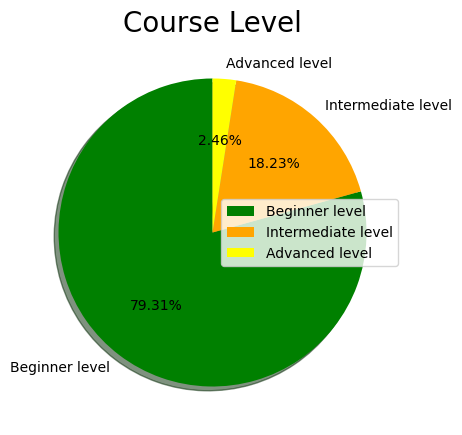

In [44]:
#Melihat presentase gender pada data

labels = ['Beginner level', 'Intermediate level', 'Advanced level']
size = df['level'].value_counts()
colors = ['green', 'orange', 'yellow']
explode = [0.1, 0, 0.1]

fig, axes = plt.subplots(figsize=(6, 5))
plt.pie(size, colors = colors,
        labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Course Level', fontsize = 20)
plt.legend()
plt.show()

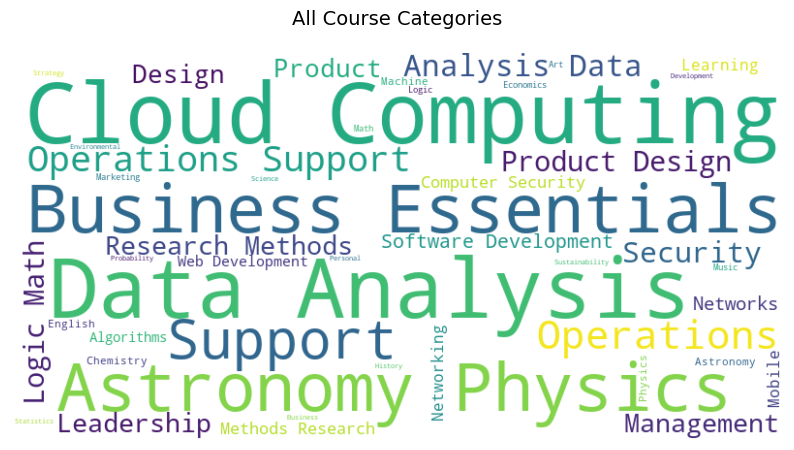

In [17]:
# Create function to generate word cloud
def generate_word_cloud(data, title):
    text = ' '.join(data['category'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    fig, ax = plt.subplots(figsize=(10, 16))
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(title, fontsize=14, pad=20)
    ax.axis("off")
    plt.show()

# Generate word cloud for all categories
generate_word_cloud(df, 'All Course Categories')

In [45]:
# Add random counts to associations for example purpose
df['count'] = np.random.randint(1, 100, size=len(df))

# Sort DataFrame by count and get top 10 associations
top_10_df = df.groupby('association').sum().sort_values(by='count', ascending=False).head(5).reset_index()

# Filter original DataFrame to include only top 10 associations
top_10_associations = top_10_df['association'].tolist()
filtered_df = df[df['association'].isin(top_10_associations)]

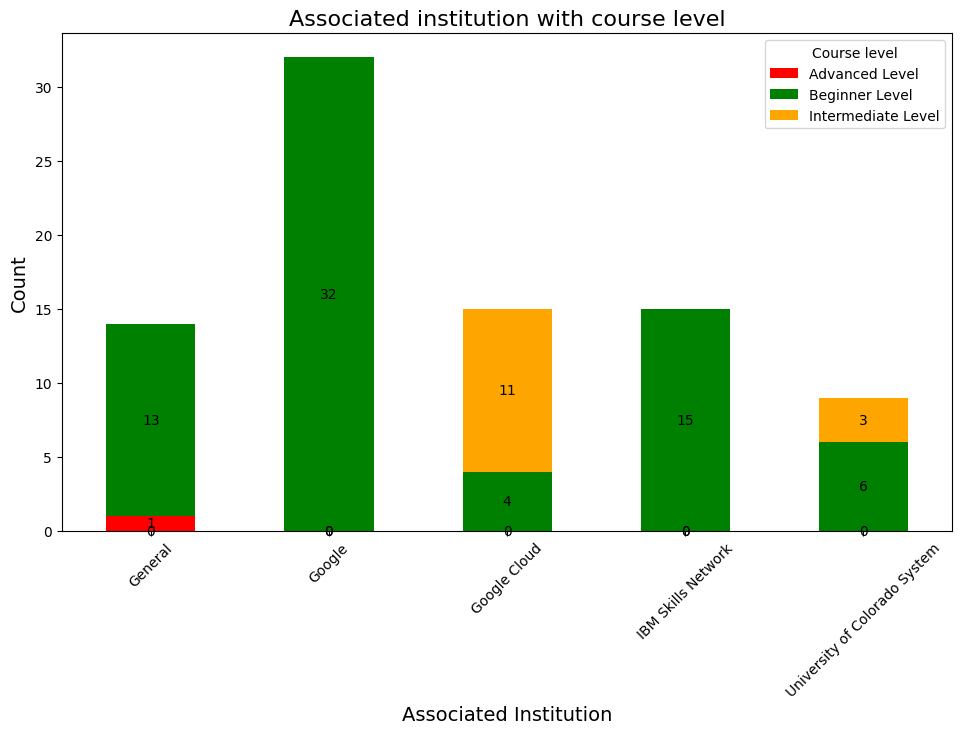

In [50]:
association_level = filtered_df.groupby(['association', 'level']).size().unstack(fill_value=0)

# Plot stacked bar chart
ax = association_level.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green', 'orange'])

# Annotate the counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.title('Associated institution with course level', fontsize=16)
plt.xlabel('Associated Institution', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Course level')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [58]:
# Add random counts to associations for example purpose
df['count'] = np.random.randint(1, 100, size=len(df))

# Sort DataFrame by count and get top 10 associations
top_5_instructors = df.groupby('instructor').sum().sort_values(by='count', ascending=False).head(5).reset_index()

# Filter original DataFrame to include only top 10 associations
top_5_instructors = top_5_instructors['instructor'].tolist()
instructor_df = df[df['instructor'].isin(top_5_instructors)]

C:\Users\Zenbook 14x\AppData\Local\Temp\ipykernel_27004\2366573668.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Course level')


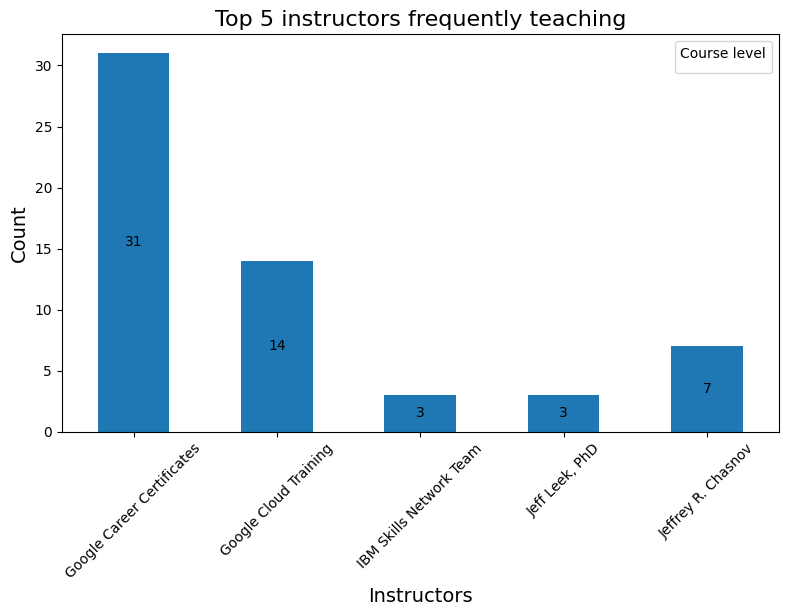

In [65]:

instructor_count = instructor_df.groupby(['instructor']).size()

# Plot stacked bar chart
ax = instructor_count.plot(kind='bar', stacked=False, figsize=(8, 5))

# Annotate the counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.title('Top 5 instructors frequently teaching', fontsize=16)
plt.xlabel('Instructors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Course level')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

INSIGHT:
- Courses in Coursera are dominated by IT and Data domains. The top 3 course categories are Support and Operations, Design and Product, Data Analysis.
- Coursera collaborates with various institutions to provide courses. Google is the most frequent provider, followed by Google Cloud, IBM Skills Network, General Assembly, and the University of Colorado.
- Google also has the highest number of course instructors. Other notable instructors teaching five or more courses include Alex Cowan, Greg Williams, and Jeffrey R. Chasnov.
- Most of the courses are designed for beginners, only few institutions provide courses for advanced level and intermediate level.